<h1><center>Experiment I --- Comparisons of GeoD with other Optimizers</center></h1>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from time import process_time
from Loss_and_Optimizer import *

# Comparing optimizers

In [32]:
def create_ops():
    """
    Obtain four different optimizers 
    
    Returns
    -----------
    Ops: list, len(Ops) = 4
       Contain four functions as optimizers
    """
    Ops = [Geo(line_search_method = 'full')]
    Ops.append(SGD(momentum=0.9,nesterov=False))
    Ops.append(SGD(momentum=0.9,nesterov=True))
    Ops.append(Adam())
    return Ops

In [33]:
Ops_name = ['Geo full','Classical Momentum', 'Nesterov', 'Adam']
Ops_name

['Geo full', 'Classical Momentum', 'Nesterov', 'Adam']

## Linear Regression

Simulate the data \
beta_ture: array, len(beta_ture) = 2, follow a normal distribution $N(1,4)$ \
X: array, X.shape = [100,2], follow a normal distribution $N(2,9)$ \
eps: array, len(eps) = 100,  follow a normal distribution $N(0,1)$ \
y: array, len(y) = 100, the value of responsible variable

In [34]:
np.random.seed(30)
beta_true = np.random.normal(1,2,2)
X = np.random.normal(2, 3, (100,2))
eps = np.random.normal(0,1,100)
y = X @ beta_true + eps 
beta_true

array([-1.52810533,  4.0558107 ])

In [35]:
# Choose mean squared loss function for linear regression problem
loss = Mean_squared_error()

In [36]:
# Set iteration = 300, calculate the MSE and cumulative running time of each iteration for each optimizer
Ops = create_ops()
MSEs = [[], [], [], []]
Times = [[], [], [], []]
T = 300
for i, Op in enumerate(Ops):
    cumulative_time = 0
    params = [0,0]
    for j in range(T):
        start_time = process_time()
        updates = Op.get_updates(loss, X, y, params)
        params = [p + u for p, u in zip(params, updates)]
        end_time = process_time()
        cumulative_time += (end_time - start_time)
        y_pre = X @ params 
        MSEs[i].append(Op.get_loss_value(loss, X, y, params))
        Times[i].append(cumulative_time)

Text(0.5, 1.0, 'The performance of different optimizers in linear regression')

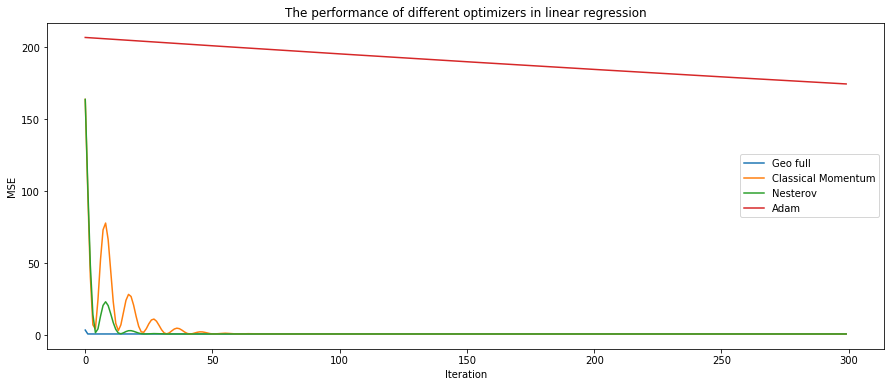

In [37]:
# plot the MSE with iteration over different optimizer.
plt.figure(figsize=(15,6))
cord = np.arange(0, 300, 1)
for i in range(len(Ops)):
    plt.plot(cord, MSEs[i])
plt.legend(Ops_name)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('The performance of different optimizers in linear regression')

#### Conslusion
As we can see from the plot, Geo full algorithm has the best performance compared to other three gradient descent algorithms especially for the few initial iterations. In addition, Adam has the worse performance.

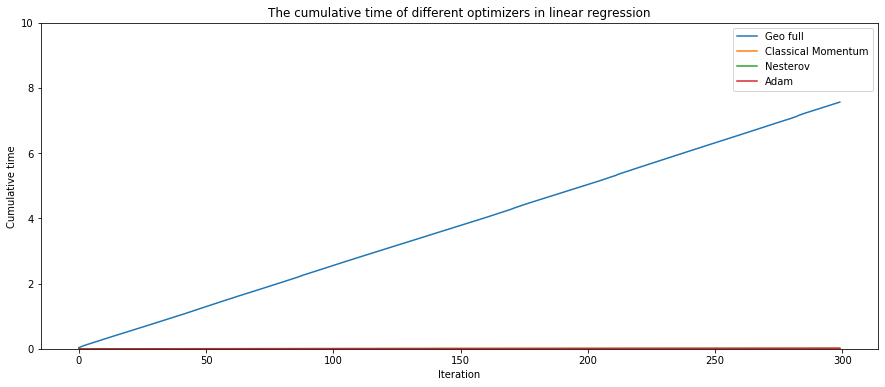

In [38]:
# plot the cumulative running time with iteration over different optimizer
plt.figure(figsize=(15,6))
cord = np.arange(0, 300, 1)
for i in range(4):
    plt.plot(cord, Times[i])
plt.legend(Ops_name[:4])
plt.xlabel('Iteration')
plt.ylabel('Cumulative time')
plt.ylim(0,10)
plt.title('The cumulative time of different optimizers in linear regression')
plt.show()

#### Conlusion
Geo full althorithm requires the most running time which might rise from the line search in the process of iteration. We will verify this in experiment 2.

In [9]:
for i in range(4):
    print('The cumulative time of 300 iteration for {} is {}s.'.format(Ops_name[i], Times[i][-1]))

The cumulative time of 300 iteration for Geo full is 9.6875s.
The cumulative time of 300 iteration for Classical Momentum is 0.0s.
The cumulative time of 300 iteration for Nesterov is 0.0s.
The cumulative time of 300 iteration for Adam is 0.015625s.


## Classification

Simulate the data \
beta_ture: array, len(beta_ture) = 2, follow a normal distribution $N(1,4)$  \
X: array, X.shape = [200,2], follow a normal distribution $N(2,9)$ \
eps: array, len(eps) = 200, follow a normal distribution $N(0,1)$ \
y: array, len(y) = 200, the value of responsible variable only containing 1 and -1 

In [10]:
np.random.seed(30)
beta_true = np.random.normal(1,4,2)
X = np.random.normal(2, 3, (200,2))
eps = np.random.normal(0,1,200)
y = 2*(X @ beta_true + eps > 0)-1
beta_true

array([-4.05621066,  7.11162141])

### Hinge

In [11]:
# Choose hinge loss function for classfication problem
loss = Hinge(False, 1)

In [12]:
# Set iteration = 300, calculate the empirical risk, accuracy and cumulative running time of each iteration for each optimizer
LOSS = [[], [], [], []]
ACUs = [[], [], [], []]
Times = [[], [], [], []]
T = 300
Ops = create_ops()

for i, Op in enumerate(Ops):
    cumulative_time = 0
    params = [0,0]
    for j in range(T):
        start_time = process_time()
        updates = Op.get_updates(loss, X, y, params)
        params = [p + u for p, u in zip(params, updates)]
        end_time = process_time()
        cumulative_time += (end_time - start_time)
        LOSS[i].append(Op.get_loss_value(loss, X, y, params))
        y_pre = 2*(X @ params > 0)-1
        ACUs[i].append( sum(y_pre == y)/len(y))
        Times[i].append(cumulative_time)

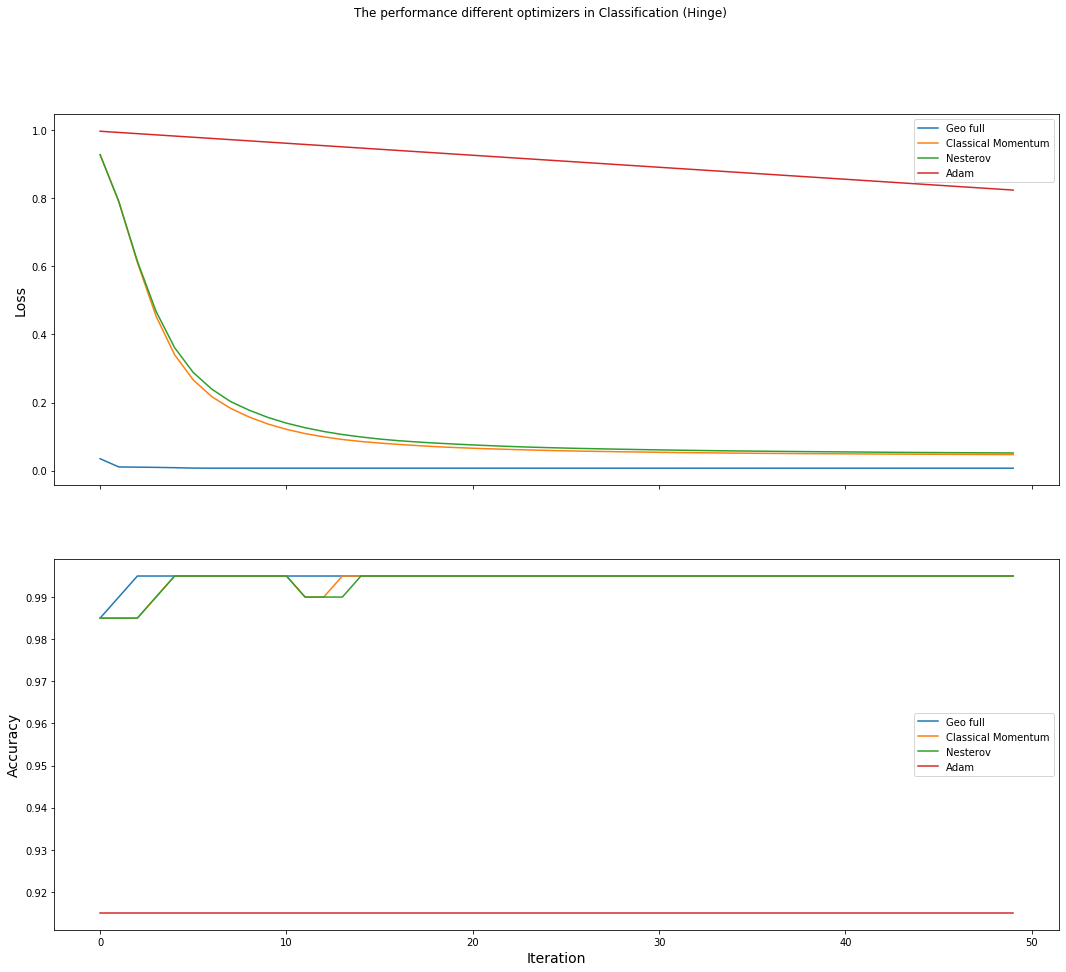

In [13]:
# plot the empirical risk and accuracy with iteration over different optimizer respectively
fig, axes = plt.subplots(2, sharex=True, figsize=(18, 15))
fig.suptitle('The performance different optimizers in Classification (Hinge)')
cord = np.arange(0, 50, 1)

axes[0].set_ylabel("Loss", fontsize=14)
for i in range(4):
    axes[0].plot(cord, LOSS[i][:50])
axes[0].legend(Ops_name)    

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Iteration", fontsize=14)
for i in range(4):
    axes[1].plot(cord, ACUs[i][:50])
axes[1].legend(Ops_name)    
    
plt.show()

#### Conlusion
For hinge loss, Geo full obtains the lowest loss while the highest accuracy especially for the few initial iterations. Adam still performs the worst.

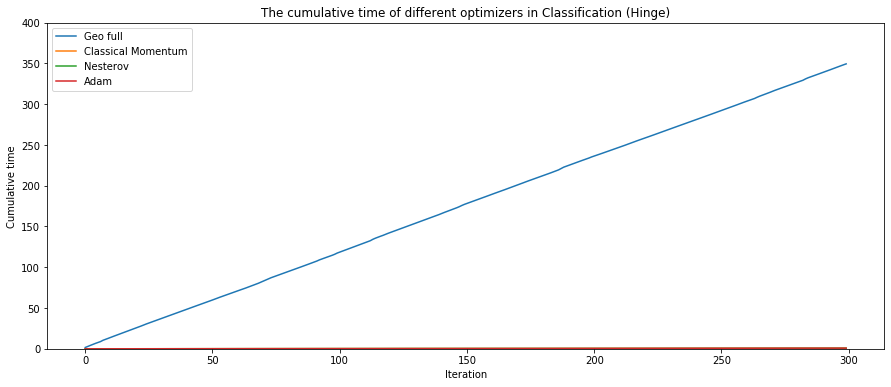

In [14]:
# plot the cumulative running time with iteration over different optimizer
plt.figure(figsize=(15,6))
cord = np.arange(0, 300, 1)
for i in range(4):
    plt.plot(cord, Times[i])
plt.legend(Ops_name[:4])
plt.xlabel('Iteration')
plt.ylabel('Cumulative time')
plt.ylim(0,400)
plt.title('The cumulative time of different optimizers in Classification (Hinge)')
plt.show()

#### Conlusion
Geo full althorithm requires the most running time which might rise from the line search in the process of iteration. 

In [15]:
for i in range(4):
    print('The cumulative time of 300 iteration for {} is {}s.'.format(Ops_name[i], Times[i][-1]))

The cumulative time of 300 iteration for Geo full is 349.4375s.
The cumulative time of 300 iteration for Classical Momentum is 0.59375s.
The cumulative time of 300 iteration for Nesterov is 0.65625s.
The cumulative time of 300 iteration for Adam is 0.796875s.


### Quadratic_hinge

In [16]:
# Choose quadratic hinge loss function for classfication problem
loss = Quadratic_hinge(False, 1)

In [17]:
# Set iteration = 300, calculate the empirical risk, accuracy and cumulative running time of each iteration for each optimizer
LOSS = [[], [], [], []]
ACUs = [[], [], [], []]
Times = [[], [], [], []]
T = 300
Ops = create_ops()

for i, Op in enumerate(Ops):
    cumulative_time = 0
    params = [0,0]
    for j in range(T):
        start_time = process_time()
        updates = Op.get_updates(loss, X, y, params)
        params = [p + u for p, u in zip(params, updates)]
        end_time = process_time()
        cumulative_time += (end_time - start_time)
        LOSS[i].append(Op.get_loss_value(loss, X, y, params))
        y_pre = 2*(X @ params > 0)-1
        ACUs[i].append( sum(y_pre == y)/len(y))
        Times[i].append(cumulative_time)

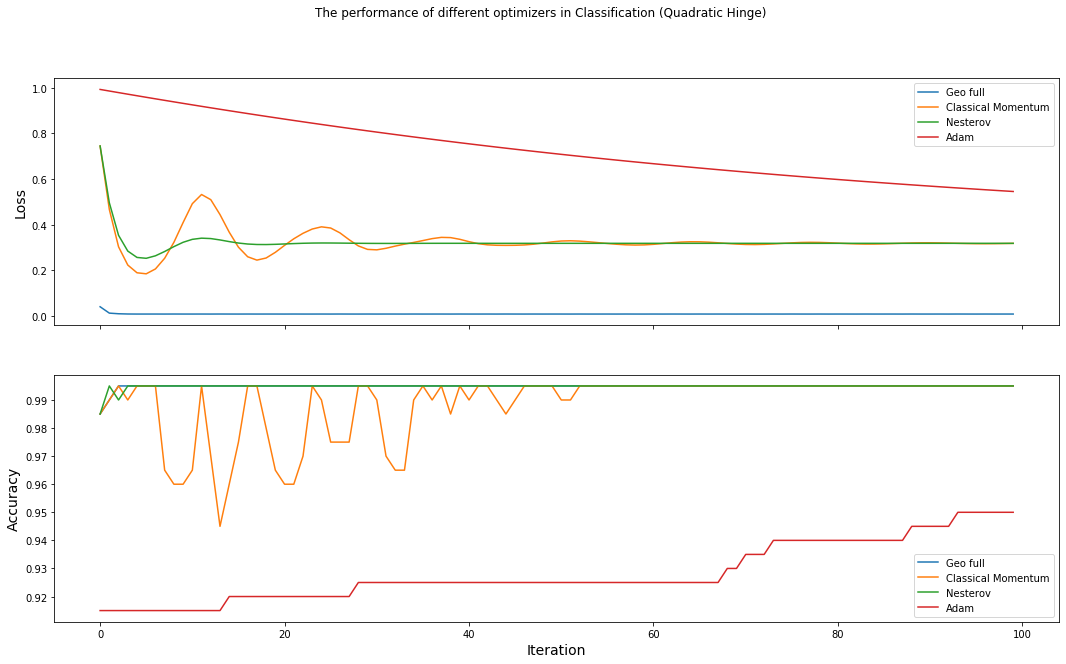

In [18]:
# plot the empirical risk and accuracy with iteration over different optimizer respectively
fig, axes = plt.subplots(2, sharex=True, figsize=(18, 10))
fig.suptitle('The performance of different optimizers in Classification (Quadratic Hinge)')
cord = np.arange(0, 100, 1)

axes[0].set_ylabel("Loss", fontsize=14)
for i in range(4):
    axes[0].plot(cord, LOSS[i][:100])
axes[0].legend(Ops_name)    

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Iteration", fontsize=14)
for i in range(4):
    axes[1].plot(cord, ACUs[i][:100])
axes[1].legend(Ops_name)    
    
plt.show()

#### Conlusion
For quadratic hinge loss, Geo full obtains the lowest loss while the highest accuracy especially for the few initial iterations. Adam algorithms needs more iteration steps to obtain a higher accuracy and lower loss. Classical momentum and Nesterov have a moderate performance and for classical momentum algorithm, it fluctuates a lot in the beginning.

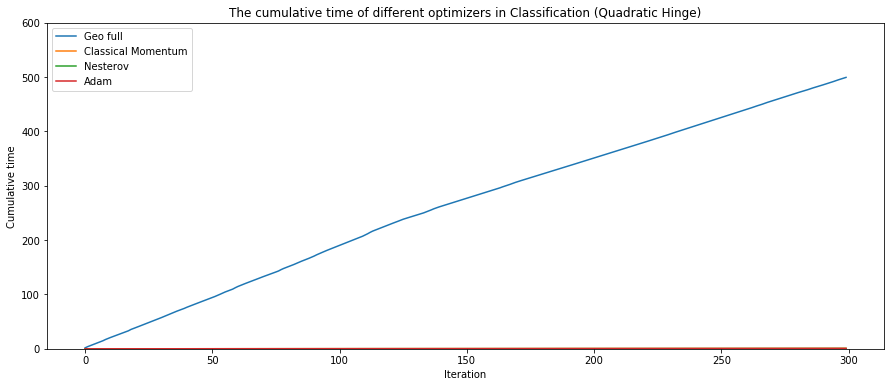

In [19]:
# plot the cumulative running time with iteration over different optimizer
plt.figure(figsize=(15,6))
cord = np.arange(0, 300, 1)
for i in range(4):
    plt.plot(cord, Times[i])
plt.legend(Ops_name[:4])
plt.xlabel('Iteration')
plt.ylabel('Cumulative time')
plt.ylim(0,600)
plt.title('The cumulative time of different optimizers in Classification (Quadratic Hinge)')
plt.show()

#### Conlusion
Geo full althorithm requires the most running time which might rise from the line search in the process of iteration. 

In [20]:
for i in range(4):
    print('The cumulative time of 300 iteration for {} is {}s.'.format(Ops_name[i], Times[i][-1]))

The cumulative time of 300 iteration for Geo full is 499.28125s.
The cumulative time of 300 iteration for Classical Momentum is 0.8125s.
The cumulative time of 300 iteration for Nesterov is 0.578125s.
The cumulative time of 300 iteration for Adam is 0.671875s.


### Smooth_hinge

In [21]:
# Choose smooth hinge loss function for classfication problem
loss = Smooth_hinge(False, 1)

In [22]:
# Set iteration = 300, calculate the empirical risk, accuracy and cumulative running time of each iteration for each optimizer
LOSS = [[], [], [], []]
ACUs = [[], [], [], []]
Times = [[], [], [], []]
T = 300
Ops = create_ops()

for i, Op in enumerate(Ops):
    cumulative_time = 0
    params = [0,0]
    for j in range(T):
        start_time = process_time()
        updates = Op.get_updates(loss, X, y, params)
        params = [p + u for p, u in zip(params, updates)]
        end_time = process_time()
        cumulative_time += (end_time - start_time)
        LOSS[i].append(Op.get_loss_value(loss, X, y, params))
        y_pre = 2*(X @ params > 0)-1
        ACUs[i].append( sum(y_pre == y)/len(y))
        Times[i].append(cumulative_time)

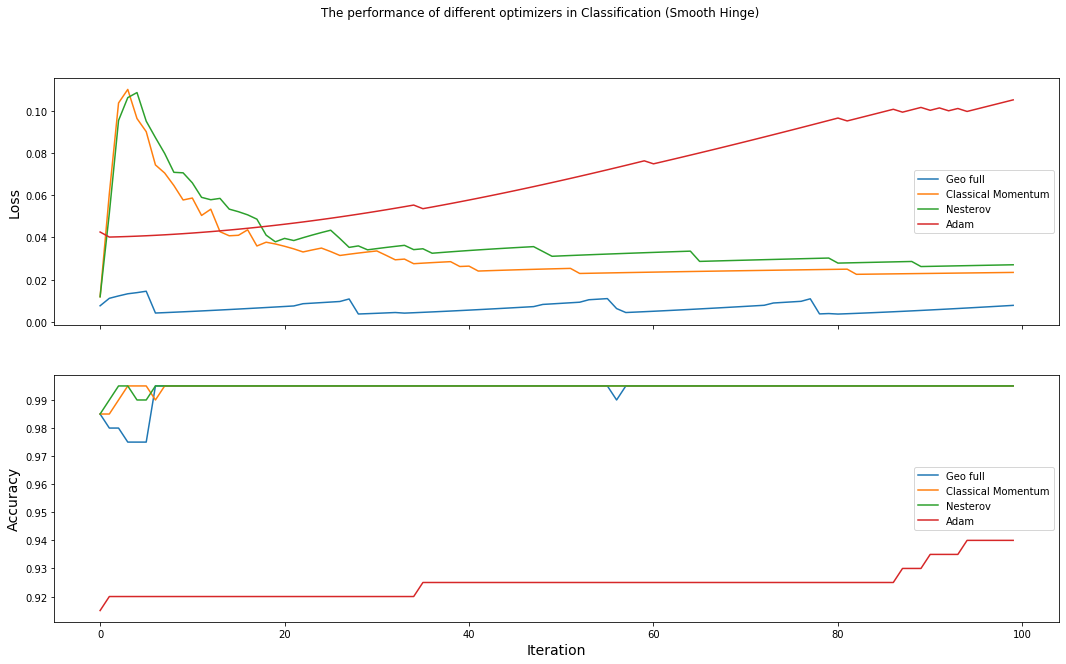

In [23]:
# plot the empirical risk and accuracy with iteration over different optimizer respectively
fig, axes = plt.subplots(2, sharex=True, figsize=(18, 10))
fig.suptitle('The performance of different optimizers in Classification (Smooth Hinge)')
cord = np.arange(0, 100, 1)

axes[0].set_ylabel("Loss", fontsize=14)
for i in range(4):
    axes[0].plot(cord, LOSS[i][:100])
axes[0].legend(Ops_name)    

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Iteration", fontsize=14)
for i in range(4):
    axes[1].plot(cord, ACUs[i][:100])
axes[1].legend(Ops_name)    
    
plt.show()

#### Conlusion
For smooth hinge loss, Geo full obtains the lowest loss while the highest accuracy. However, classical momentum and Nesterov performs better than GeoD for the few initial iterations. Adam algorithms still needs more iteration steps to obtain a higher accuracy and lower loss.

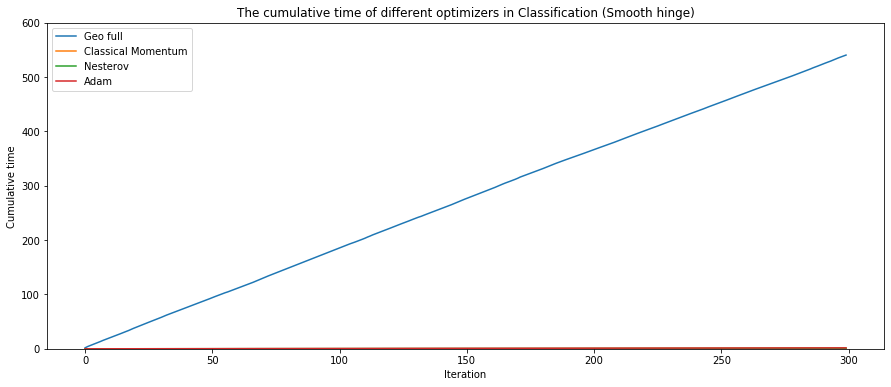

In [24]:
# plot the cumulative running time with iteration over different optimizer
plt.figure(figsize=(15,6))
cord = np.arange(0, 300, 1)
for i in range(4):
    plt.plot(cord, Times[i])
plt.legend(Ops_name[:4])
plt.xlabel('Iteration')
plt.ylabel('Cumulative time')
plt.ylim(0,600)
plt.title('The cumulative time of different optimizers in Classification (Smooth hinge)')
plt.show()

#### Conlusion
Geo full althorithm requires the most running time which might rise from the line search in the process of iteration. 

In [25]:
for i in range(4):
    print('The cumulative time of 300 iteration for {} is {}s.'.format(Ops_name[i], Times[i][-1]))

The cumulative time of 300 iteration for Geo full is 540.34375s.
The cumulative time of 300 iteration for Classical Momentum is 0.8125s.
The cumulative time of 300 iteration for Nesterov is 0.9375s.
The cumulative time of 300 iteration for Adam is 1.703125s.
